# 8.8. Detecting hidden structures in a dataset with clustering

In [1]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = ds.make_blobs(n_samples=200,
                     n_features=2,
                     centers=3,
                     cluster_std=1.5,
                     )

In [3]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                   for perm in perms])
    p = perms[i]
    return p[cl]

In [4]:
def display_clustering(labels, title):
    """Plot the data points with the cluster
    colors."""

    # We relabel the classes when there are 3 clusters
    labels = relabel(labels)
    fig, axes = plt.subplots(1, 2, figsize=(8, 3),
                             sharey=True)
    # Display the points with the true labels on the
    # left, and with the clustering labels on the
    # right.
    for ax, c, title in zip(
            axes,
            [y, labels],
            ["True labels", title]):
        ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
                   linewidths=0, cmap=plt.cm.rainbow)
        ax.set_title(title)

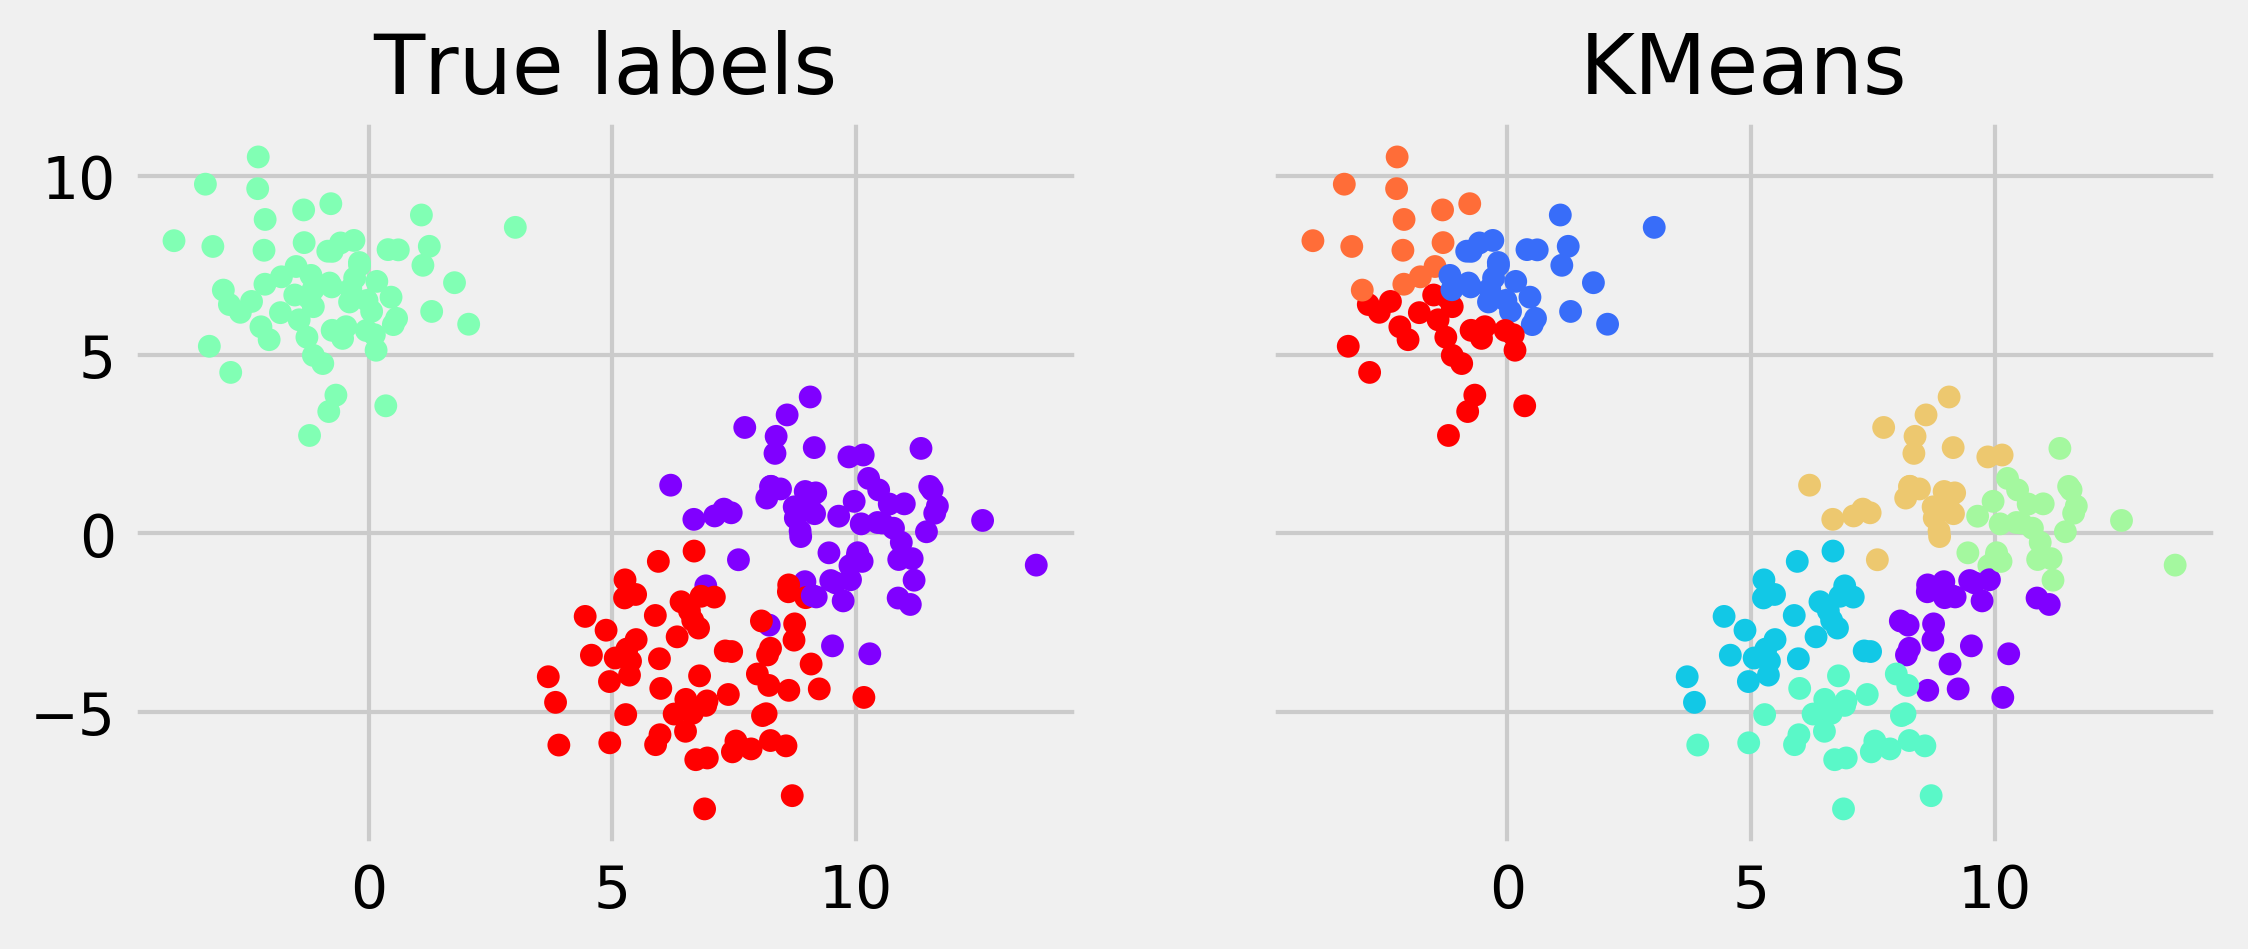

In [5]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

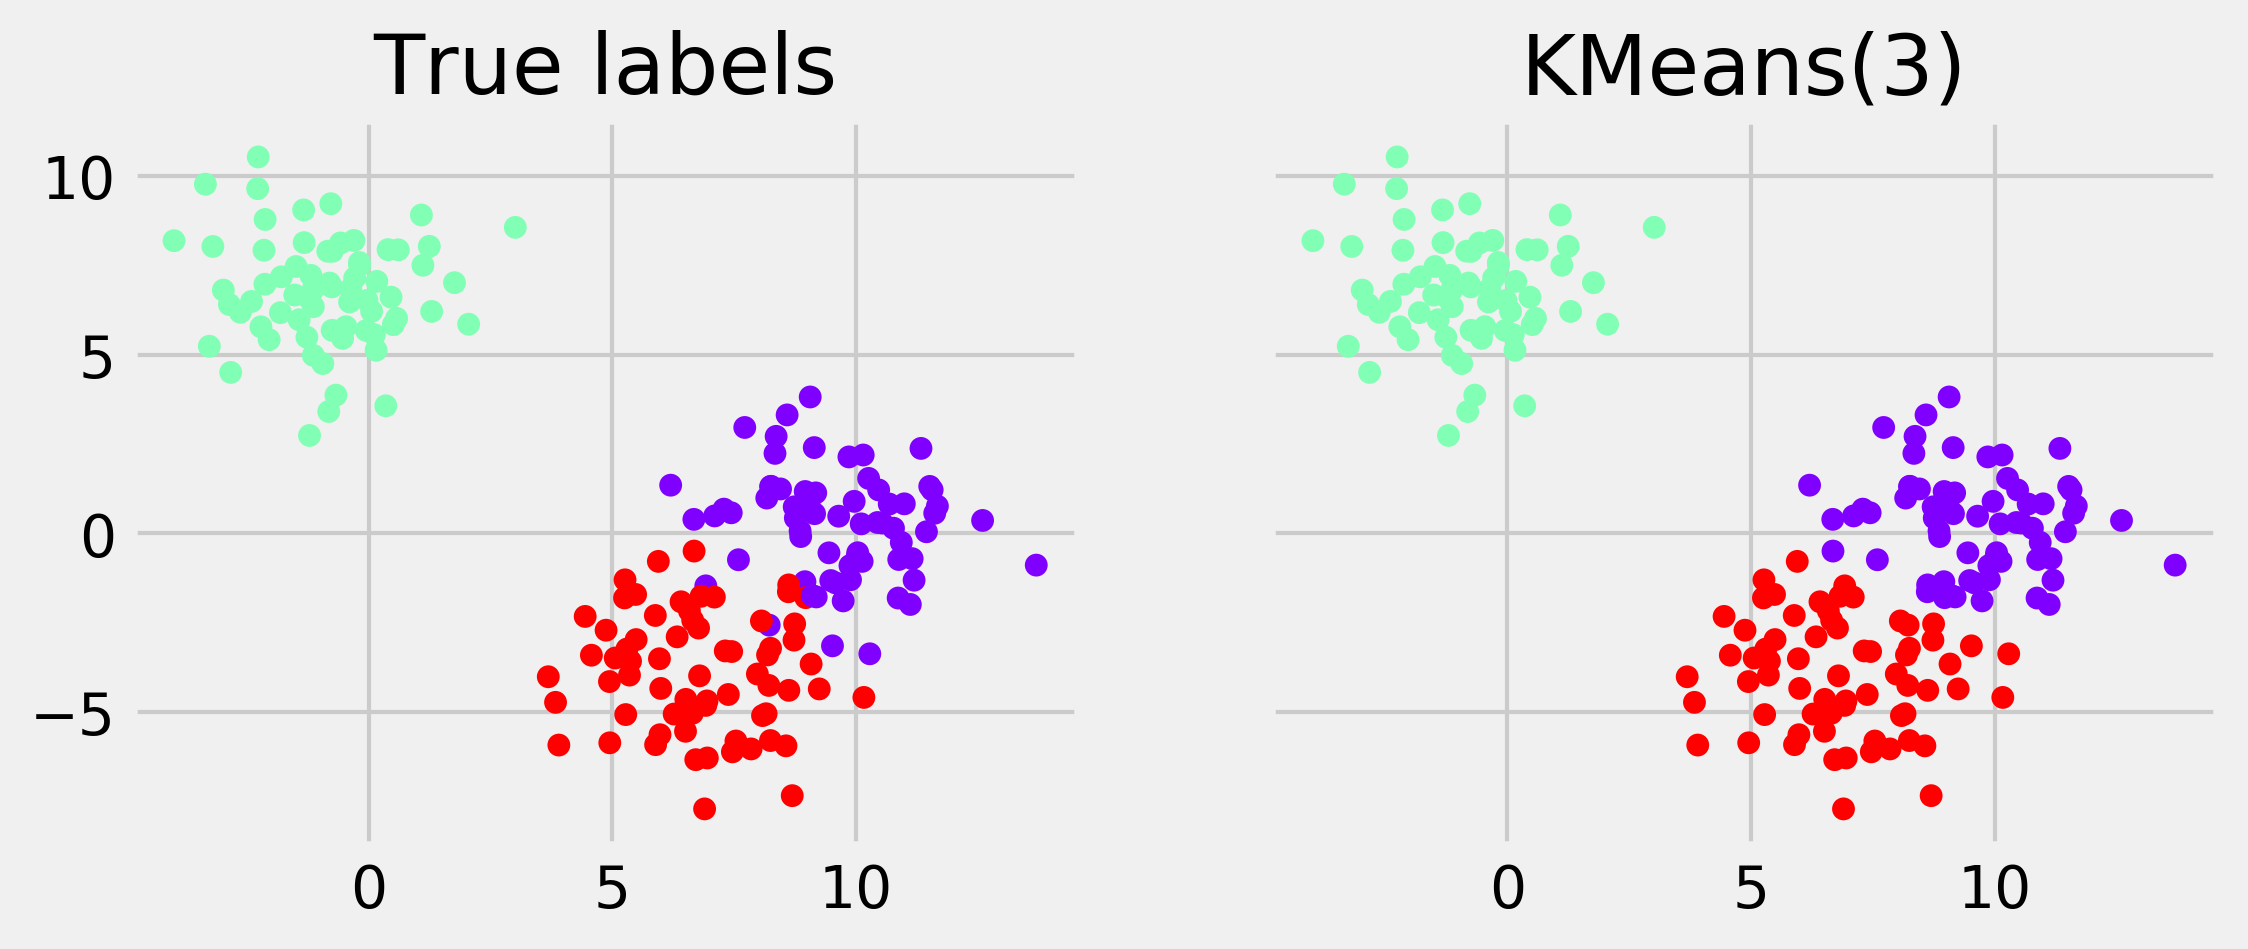

In [6]:
km = clu.KMeans(n_clusters=3)
km.fit(X)
display_clustering(km.labels_, "KMeans(3)")

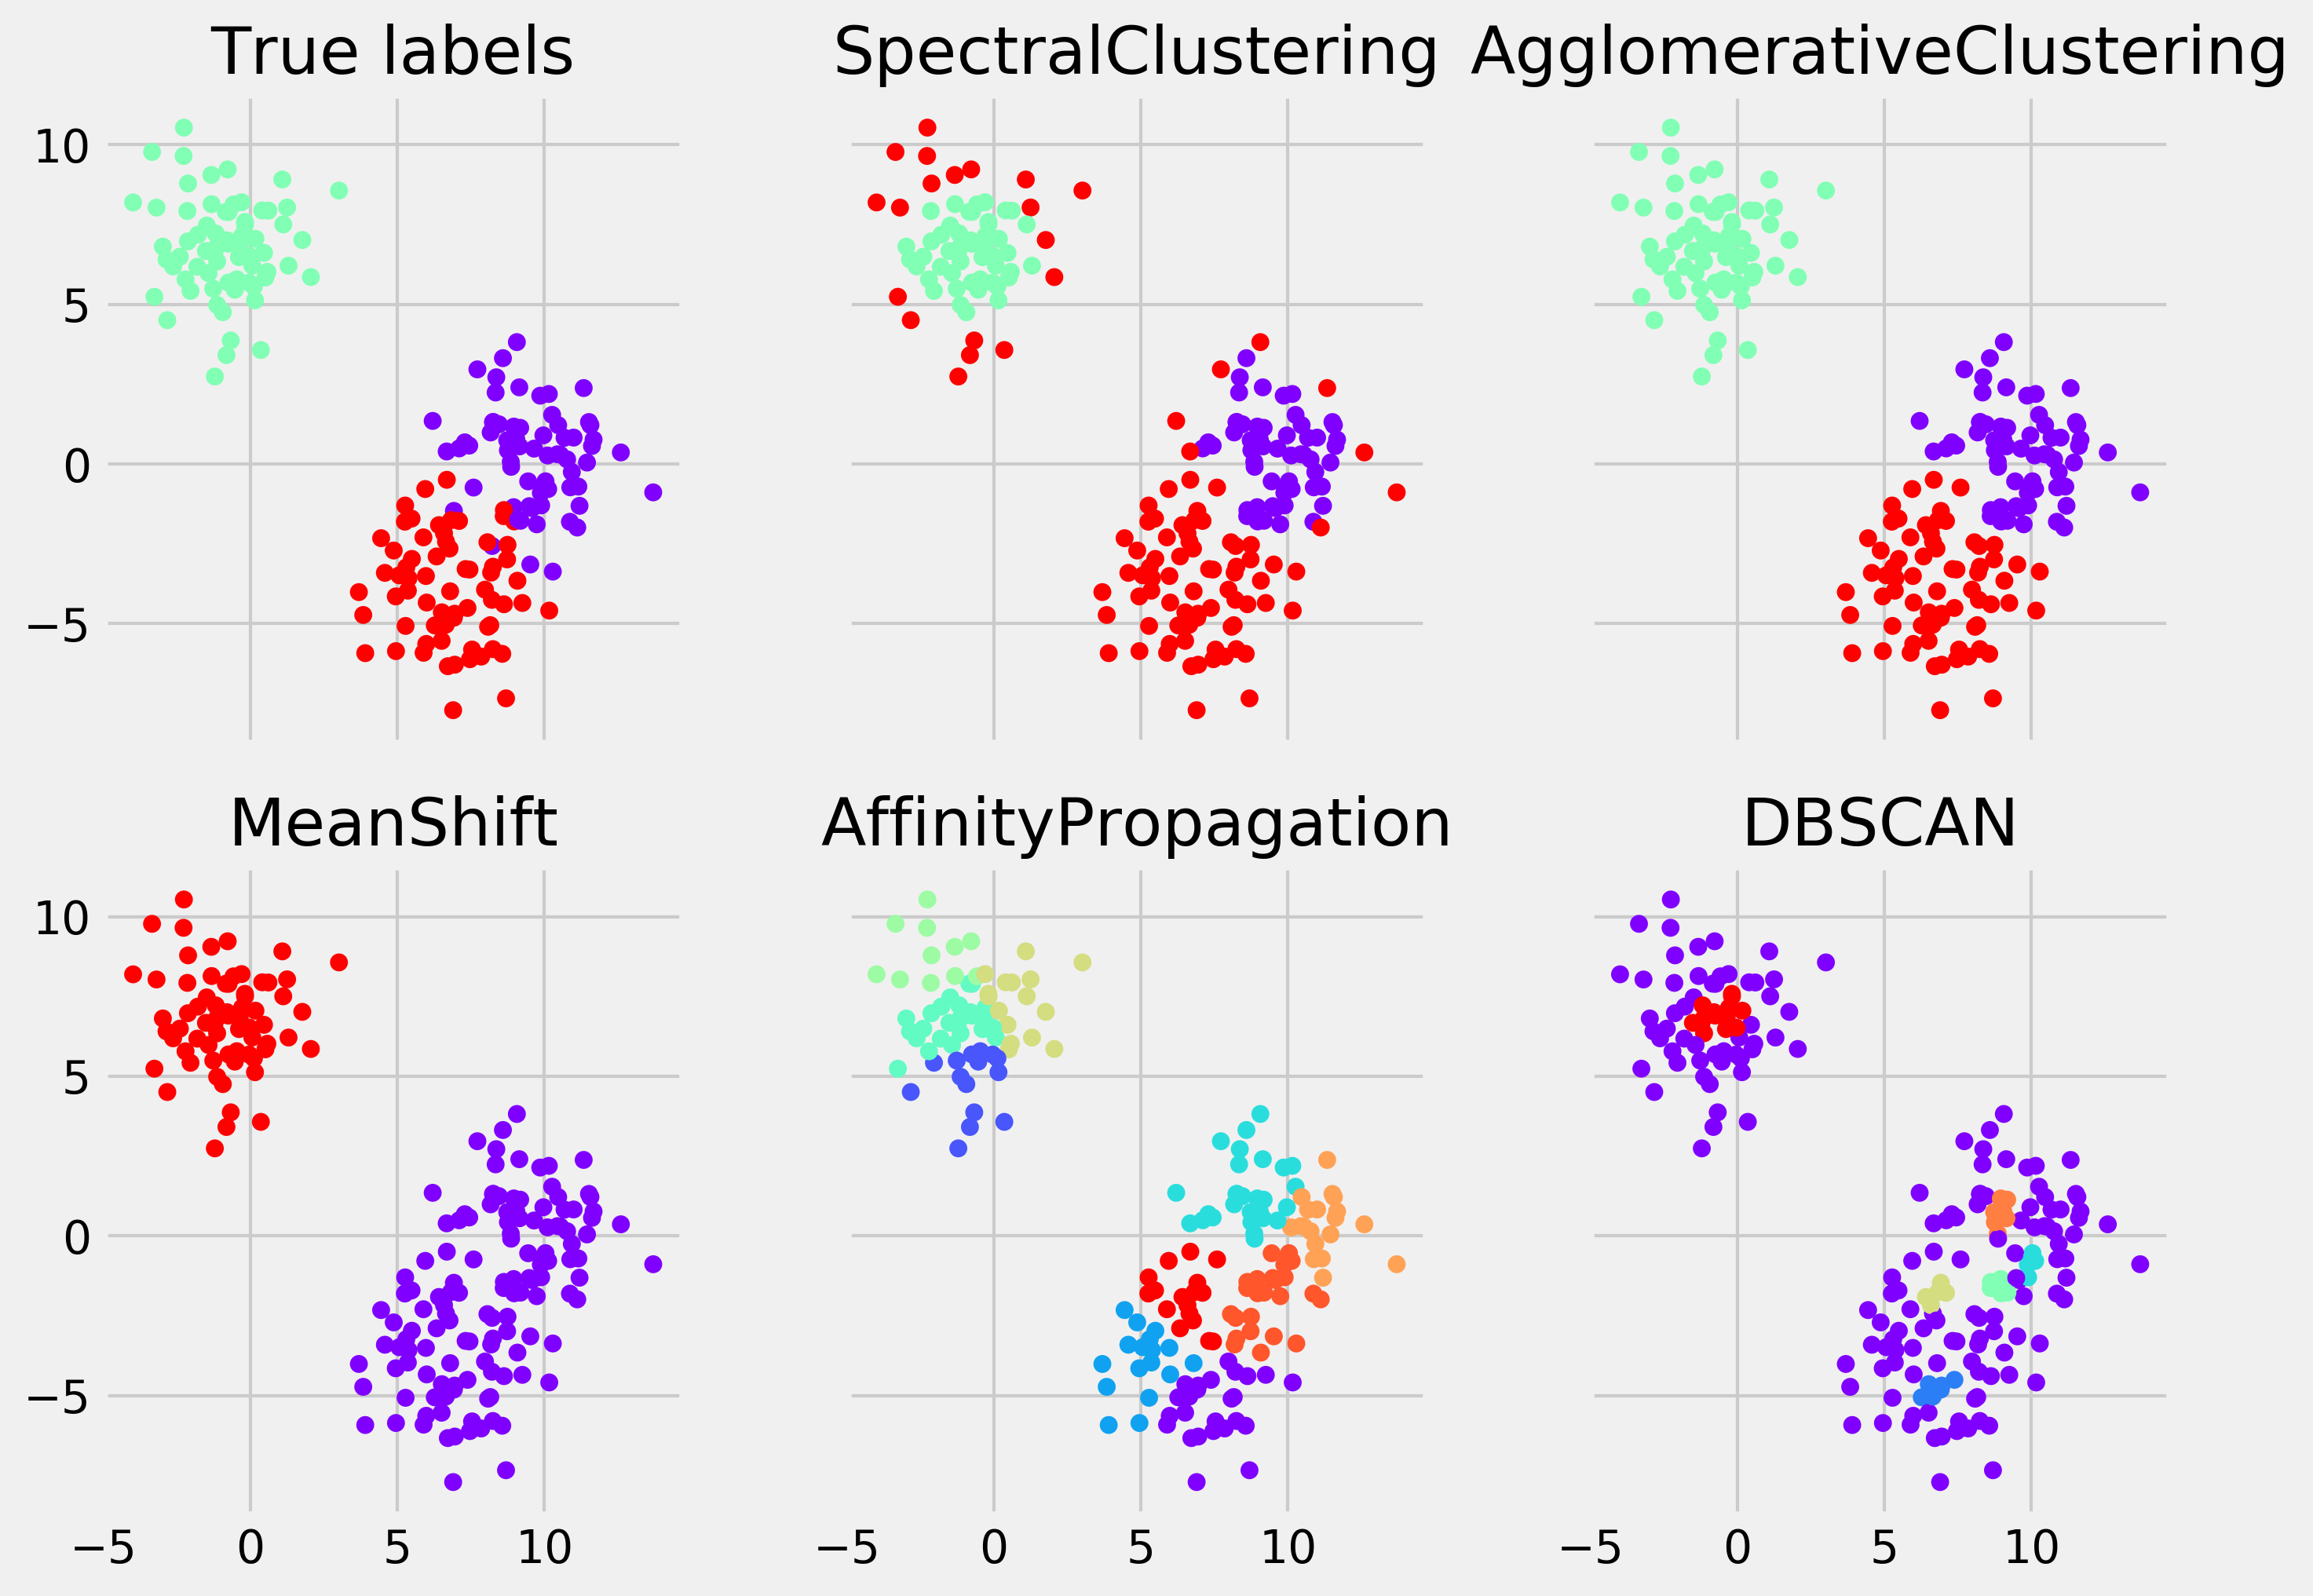

In [7]:
fig, axes = plt.subplots(2, 3,
                         figsize=(10, 7),
                         sharex=True,
                         sharey=True)

axes[0, 0].scatter(X[:, 0], X[:, 1],
                   c=y, s=30,
                   linewidths=0,
                   cmap=plt.cm.rainbow)
axes[0, 0].set_title("True labels")

for ax, est in zip(axes.flat[1:], [
    clu.SpectralClustering(3),
    clu.AgglomerativeClustering(3),
    clu.MeanShift(),
    clu.AffinityPropagation(),
    clu.DBSCAN(),
]):
    est.fit(X)
    c = relabel(est.labels_)
    ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
               linewidths=0, cmap=plt.cm.rainbow)
    ax.set_title(est.__class__.__name__)

# Fix the spacing between subplots.
fig.tight_layout()